In [278]:
import sys
import skimage
from skimage import data, feature, filters, color, img_as_float, measure
from scipy import misc
from skimage.measure import regionprops
from skimage.measure import label
from skimage.filters import threshold_yen
from skimage.filters import threshold_otsu
from skimage.filters import threshold_mean
from skimage.filters import try_all_threshold
from matplotlib import pyplot as plt
from matplotlib import cm
from skimage.morphology import skeletonize
from skimage.feature import canny
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage import io
from skimage import img_as_uint

import glob
from PIL import Image

import pims
from pims import Frame
import trackpy as tp
import imageio

#path = '/Users/alexandralong/Documents/UCSF/Dumont Lab/Analysis/Micromanipulation/Translation Fiji testing/old/Input1/'
path = '/Users/alexandralong/Documents/UCSF/Dumont Lab/Analysis/Micromanipulation/Translation Fiji testing/old/Input/'

image = pims.ImageSequence('%s*.tif'%path)

In [326]:
# This is for thresholding using a difference of gaussians

for i in range(60,75):#(0,len(image)-1):
    s1 = skimage.filters.gaussian(image[i],2)
    s2 = skimage.filters.gaussian(image[i],5)
    dog = s1 - s2
    global_thresh = threshold_yen(dog)
    #test_thresh = threshold_otsu(image[i])
    binary_global = dog > global_thresh
    imageio.imwrite('%smask%s.tif'%(path,i),binary_global*1)
    imageio.imwrite('%sthresh%s.tif'%(path,i),binary_global*1*image[i])

In [327]:
mask = pims.ImageSequence('%smask*.tif'%path)
thresh_image = pims.ImageSequence('%sthresh*.tif'%path)

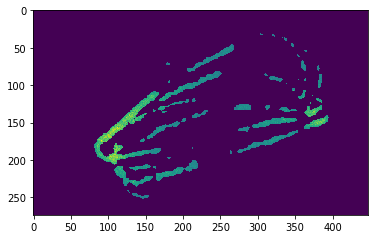

In [328]:
plt.imshow(thresh_image[75])

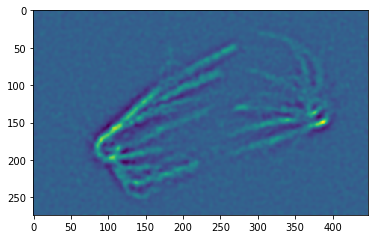

In [329]:
plt.imshow(dog)

([array([9., 0., 1.]), array([11.,  0.,  0.])],
 array([-1.01383282e-01,  3.11635991e+04,  6.23272995e+04,  9.34910000e+04]),
 <a list of 2 Lists of Patches objects>)

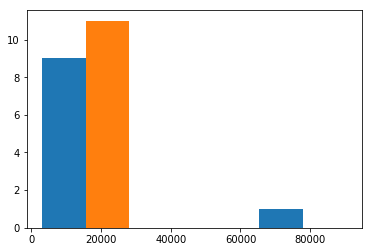

In [339]:
n = np.histogram(dog)
plt.hist(n,bins = 3)

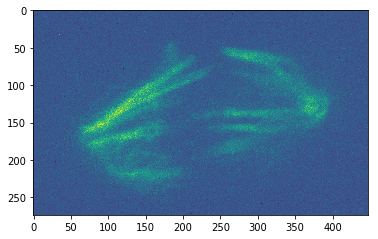

In [286]:
plt.imshow(image[1])

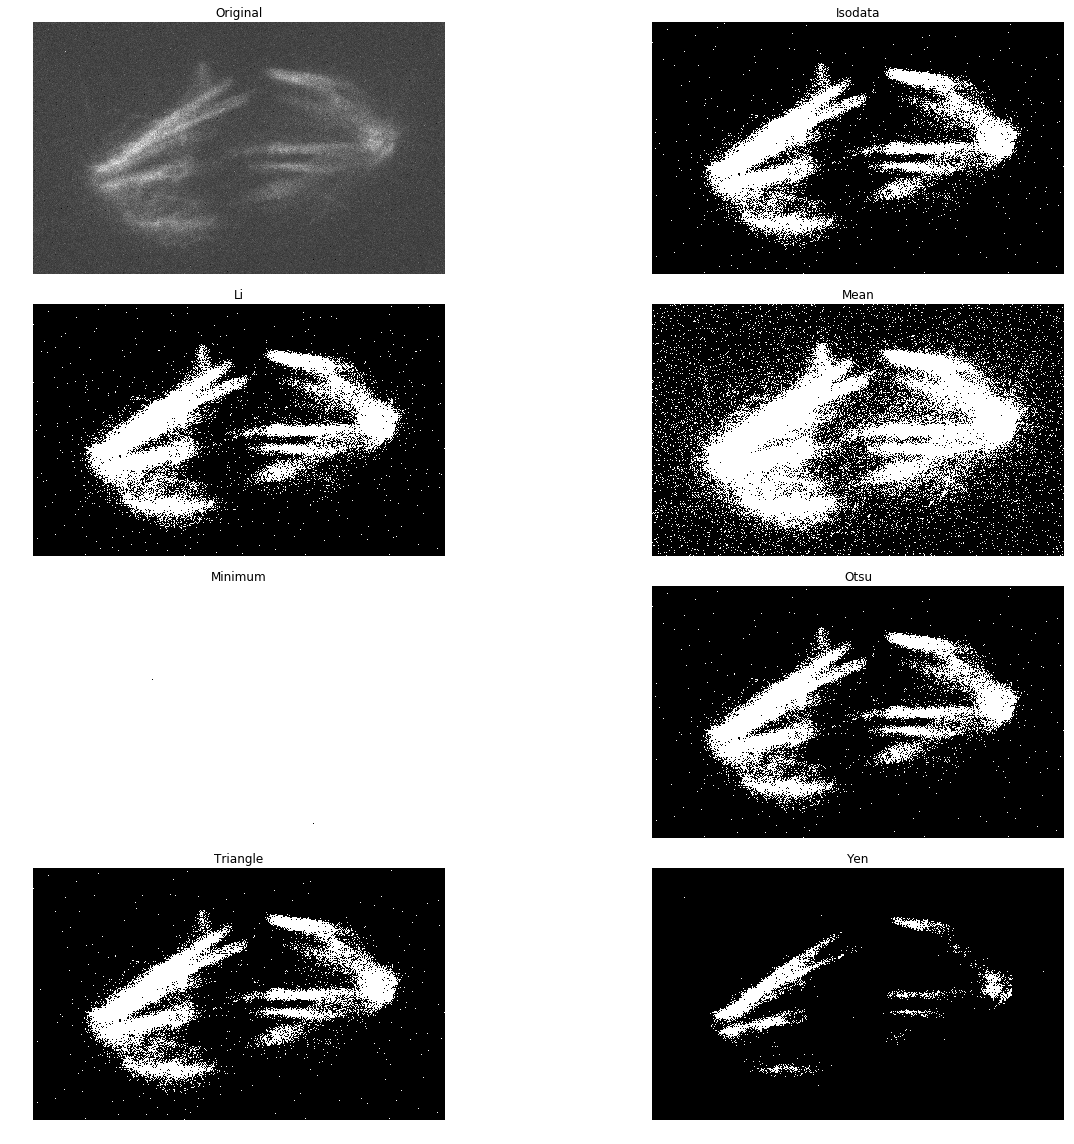

In [298]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(image[1], figsize=(20, 16), verbose=False)
plt.show()

#test = image[1] > threshold_otsu(image[1])

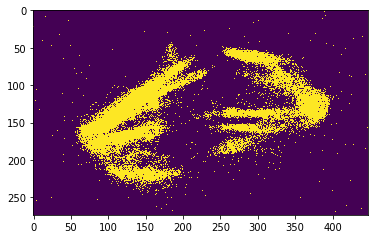

In [297]:
#plt.imshow(test)

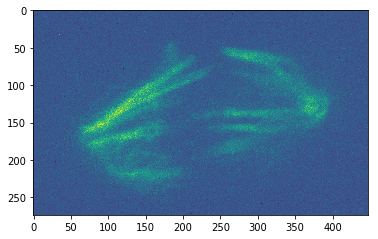

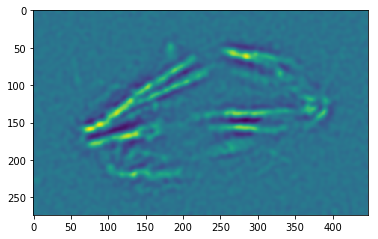

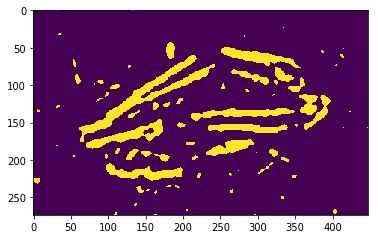

In [380]:
# test out threshold first then dog
im = image[1]
s3 = skimage.filters.gaussian(im,3)
s4 = skimage.filters.gaussian(im,5)
dog = s3 - s4
#global_thresh = threshold_otsu(im)
new_im = dog > 1.3e-05

plt.imshow(im)
plt.show()
plt.imshow(dog)
plt.show()
plt.imshow(new_im)
plt.show()

In [375]:
global_thresh

132

In [365]:
m = dog

In [366]:
t = m.flatten()

(array([4.8000e+01, 1.0900e+02, 1.4500e+02, 2.1100e+02, 3.8000e+02,
        6.0400e+02, 1.0480e+03, 1.6550e+03, 2.7480e+03, 4.5980e+03,
        1.0516e+04, 5.6792e+04, 3.0393e+04, 3.6220e+03, 2.2330e+03,
        1.6740e+03, 1.3390e+03, 1.1080e+03, 8.6800e+02, 6.2500e+02,
        4.5400e+02, 4.0100e+02, 3.2600e+02, 2.4800e+02, 2.0500e+02,
        1.4300e+02, 1.1600e+02, 7.2000e+01, 5.2000e+01, 1.9000e+01]),
 array([-5.98894740e-05, -5.48560360e-05, -4.98225979e-05, -4.47891599e-05,
        -3.97557219e-05, -3.47222838e-05, -2.96888458e-05, -2.46554078e-05,
        -1.96219697e-05, -1.45885317e-05, -9.55509367e-06, -4.52165564e-06,
         5.11782390e-07,  5.54522042e-06,  1.05786585e-05,  1.56120965e-05,
         2.06455345e-05,  2.56789725e-05,  3.07124106e-05,  3.57458486e-05,
         4.07792866e-05,  4.58127247e-05,  5.08461627e-05,  5.58796007e-05,
         6.09130388e-05,  6.59464768e-05,  7.09799148e-05,  7.60133529e-05,
         8.10467909e-05,  8.60802289e-05,  9.11136670e-05]

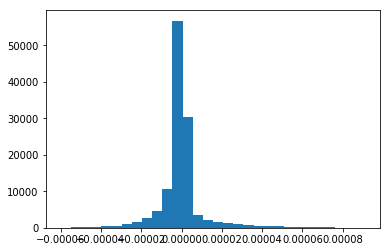

In [367]:
plt.hist(t,bins=30)

In [368]:
j = threshold_otsu(dog)

In [369]:
j


1.590702449342257e-05